In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [2]:
from helpers import load_data, preprocess_data

path_dataset = "data/data_train.csv"
ratings = load_data(path_dataset)

number of items: 1000, number of users: 10000


### Plot the number of ratings per movie and user

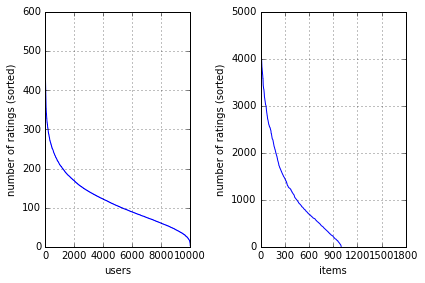

min # of items per user = 3, min # of users per item = 8.


In [3]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of items per user = {}, min # of users per item = {}.".format(
        min(num_items_per_user), min(num_users_per_item)))

### Split the data into a train and test set

In [37]:
from plots import plot_train_test_data
from helpers import split_data

valid_ratings, train, test = split_data(
    ratings, num_items_per_user, num_users_per_item, min_num_ratings=10, p_test=0.1)


1000 10000
1176873
1176873
Total number of nonzero elements in original data:1176873
Total number of nonzero elements in train data:1058916
Total number of nonzero elements in test data:117957


  (0, 0)	3.0
  (0, 1)	4.0
  (0, 2)	4.0
  (0, 3)	3.0
  (0, 4)	2.0
  (0, 5)	3.0
  (0, 6)	5.0
  (0, 7)	4.0
  (0, 8)	4.0
  (0, 9)	3.0
  (0, 10)	5.0
  (0, 11)	4.0
  (0, 12)	4.0
  (0, 13)	5.0
  (0, 14)	2.0
  (0, 15)	4.0
  (0, 16)	2.0
  (0, 17)	5.0
  (0, 18)	3.0
  (0, 19)	3.0
  (0, 20)	4.0
  (0, 21)	3.0
  (0, 22)	3.0
  (0, 23)	5.0
  (0, 24)	5.0
  (0, 25)	4.0
  (0, 26)	4.0
  (0, 27)	5.0
  (0, 28)	3.0
  (0, 29)	4.0
  (0, 30)	2.0
  (0, 31)	3.0
  (0, 32)	4.0
  (0, 33)	1.0
  (0, 34)	3.0
  (0, 35)	3.0
  (0, 36)	4.0
  (0, 37)	4.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	4.0
  (0, 42)	3.0
  (0, 43)	4.0
  (0, 44)	5.0
  (0, 45)	3.0
  (0, 46)	3.0
  (0, 47)	2.0
  (0, 48)	2.0
  (0, 49)	4.0
  (0, 50)	3.0
  (0, 51)	4.0
  (0, 52)	4.0
  (0, 53)	2.0
  (0, 54)	3.0
  (0, 55)	4.0
  (0, 56)	3.0
  (0, 57)	3.0
  (0, 58)	2.0
  (0, 59)	5.0
  (0, 60)	3.0
  (0, 61)	2.0
  (0, 62)	3.0
  (0, 63)	4.0
  (0, 64)	4.0
  (0, 65)	4.0
  (0, 66)	4.0
  (0, 67)	1.0
  (0, 68)	4.0
  (0, 69)	2.0
  (0, 70)	4.0
  (0, 71)	3.0
  

ValueError: setting an array element with a sequence.

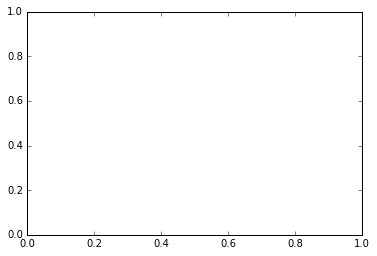

In [103]:
from outliers_filtering import *
d = disagreements(train)
plot_disagreements(d)
train = filter_outliers(train,d)

## Implementing Baselines 

### Use the global mean to do the prediction

In [ ]:
from helpers import calculate_mse
from baselines import baseline_global_mean

mean = baseline_global_mean(train, test)
pred = np.ones(train.shape) * mean[0]
nz = valid_ratings.nonzero()
diff = valid_ratings[nz] - pred[nz]
rmse = 1/2 * np.sum(np.square(diff)) / len(nz[0])
rmse

### Use the user means as the prediction

In [ ]:
from baselines import baseline_user_mean

mean = baseline_user_mean(train, test)
print(mean[0].shape)
means = mean[0].tolist()
print(train.shape)
pred = np.ones(train.shape)
for col in range(train.shape[1]):
    pred[:,col] *= means[0][col]
nz = valid_ratings.nonzero()
diff = valid_ratings[nz] - pred[nz]
rmse = 1/2 * np.sum(np.square(diff)) / len(nz[0])
rmse

### Use the item means as the prediction

In [ ]:
from baselines import baseline_item_mean
from helpers import exportSubmission

mean = baseline_item_mean(train, test)
print(mean[0].shape)
means = mean[0].tolist()
print(len(means))
print(train.shape)
pred = np.ones(train.shape)
for col in range(train.shape[0]):
    pred[col,:] *= means[col]
nz = valid_ratings.nonzero()
diff = valid_ratings[nz] - pred[nz]
rmse = 1/2 * np.sum(np.square(diff)) / len(nz[0])
print(rmse)

exportSubmission("data/submission_item_mean.csv", pred)

### Learn the Matrix Factorization using SGD

#### Initialize matrix factorization

Compute the cost by the method of matrix factorization.


In [ ]:
from matrix_factorization import matrix_factorization_SGD
user_features, item_features = matrix_factorization_SGD(train, test)

In [ ]:
from helpers import compute_error
print(compute_error(valid_ratings, user_features, item_features, valid_ratings.nonzero()))

In [ ]:
pred =  (item_features @ user_features.T)
exportSubmission("data/submission_MF.csv", pred)

In [ ]:
errors = []
for i in np.arange(10, 20, 2):
    user_features, item_features = matrix_factorization_SGD(train, test, num_epochs = 15, num_features = i)
    error = compute_error(valid_ratings, user_features, item_features, valid_ratings.nonzero())
    errors.append(error)


In [ ]:
from plots import visualization
visualization(np.arange(10, 20, 2),errors,errors)

### Learn the Matrix Factorization using Alternating Least Squares

In [ ]:
def update_user_feature(
        train, item_features, lambda_user,
        nnz_items_per_user, nz_user_itemindices):
    """update user feature matrix."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # update and return user feature.
    # ***************************************************
    raise NotImplementedError

def update_item_feature(
        train, user_features, lambda_item,
        nnz_users_per_item, nz_item_userindices):
    """update item feature matrix."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # update and return item feature.
    # ***************************************************
    raise NotImplementedError

In [ ]:
from helpers import build_index_groups


def ALS(train, test):
    """Alternating Least Squares (ALS) algorithm."""
    # define parameters
    num_features = 20   # K in the lecture notes
    lambda_user = 0.1
    lambda_item = 0.7
    stop_criterion = 1e-4
    change = 1
    error_list = [0, 0]
    
    # set seed
    np.random.seed(988)

    # init ALS
    user_features, item_features = init_MF(train, num_features)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # start you ALS-WR algorithm.
    # ***************************************************
    raise NotImplementedError

ALS(train, test)